# Zoning Board of Appeal Tracker EDA
Initial Visualizations and Exploratory data analysis. Explanations of relevant graphs and their analyses are in the report.

Note: This notebook was curated for use with the final report as a more polished distillation of our work. Some less interesting or important analysis is left out for brevity, but is available in the original project notebooks.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_columns', 100)

# estimated runtime ~10 seconds

In [3]:
df = pd.read_csv("../data/cleaned_zba.csv")
df.head(5)

,status,parent_apno,boa_apno,appeal_type,deferrals,decision,city,zipcode,ward,zoning_district,text,year,month,day,hearing_submitted,final_submitted,final_hearing,closed_submitted,closed_final,closed_hearing
0,1,NaN,1534017,0,NaN,NaN,Jamaica Plain,2130,19,Jamaica Plain,NaN,2023,10,7,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,1534015,0,NaN,NaN,Roslindale,2131,19,Jamaica Plain,NaN,2023,10,7,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1486864.0,1533753,0,NaN,NaN,East Boston,2128,1,East Boston,change occupancy family to extend living spa...,2023,10,6,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1527237.0,1533784,0,NaN,NaN,Brighton,2135,21,Allston/Brighton,change occupancy from family to add bathroom...,2023,10,6,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1515294.0,1533227,0,NaN,NaN,Roslindale,2131,20,Roslindale,building new family duplex home market rate u...,2023,10,5,NaN,NaN,NaN,NaN,NaN,NaN


### EDA - Columns
Below we have combined the code for some initial plots to understand the data. This way the viewer can minimize the code block and see all the plots together

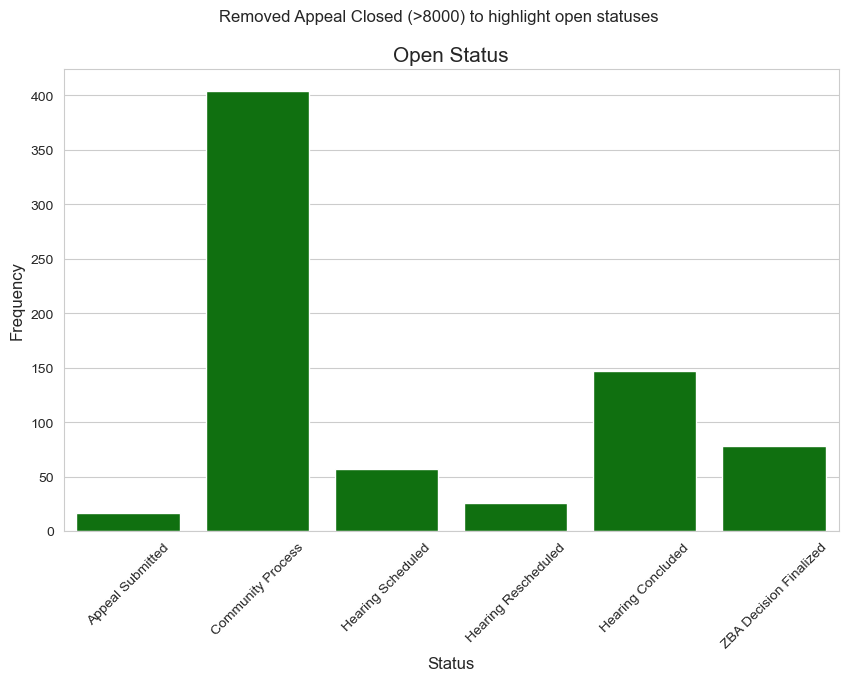

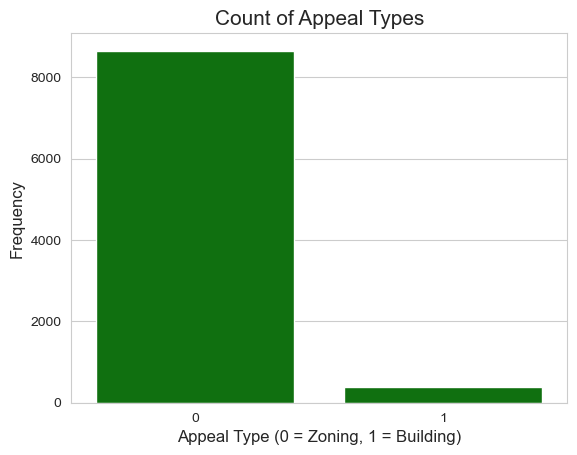

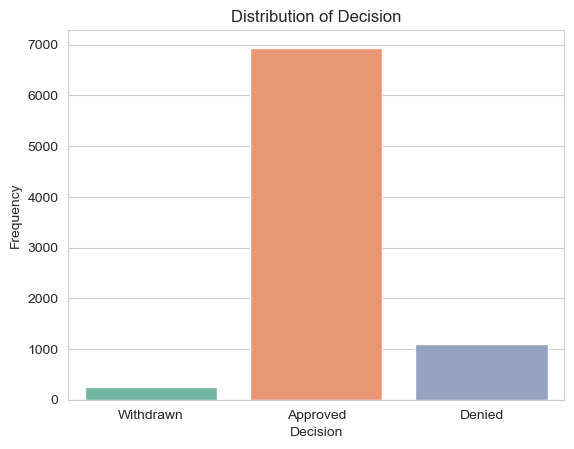

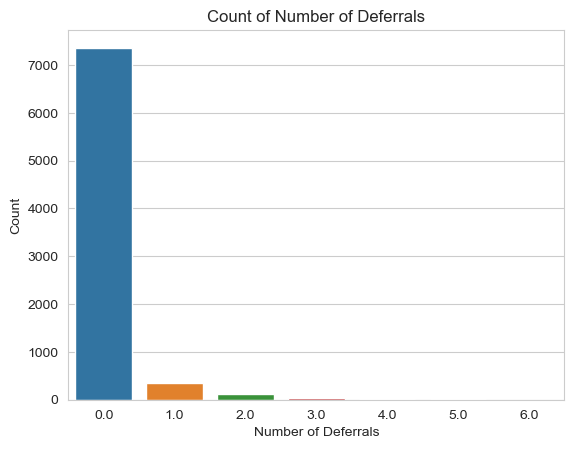

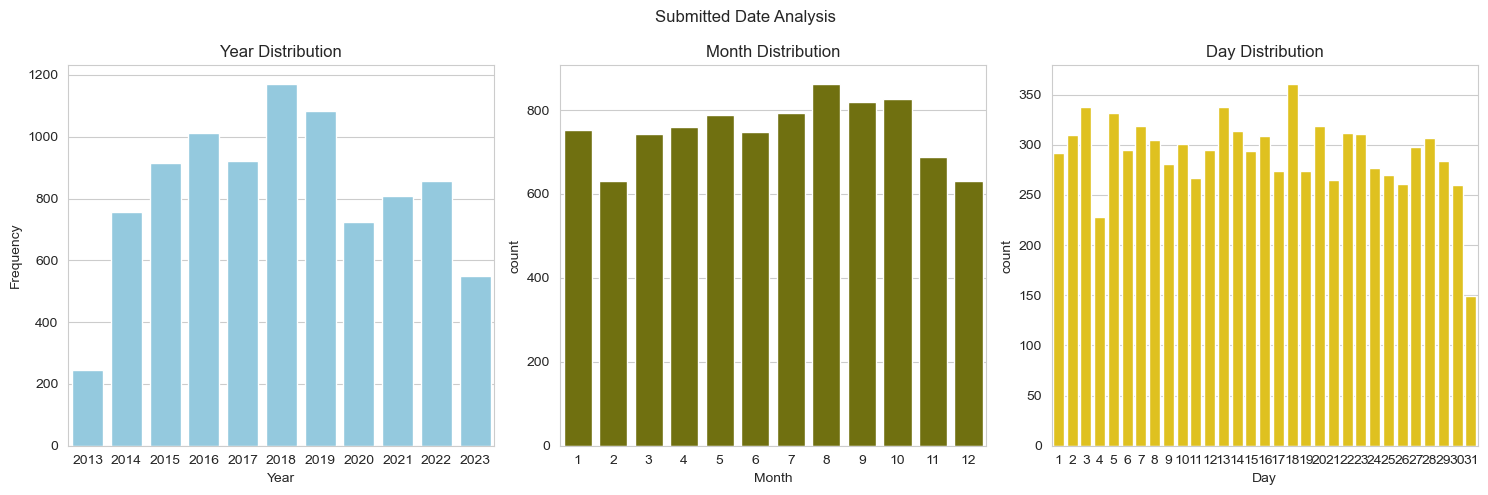

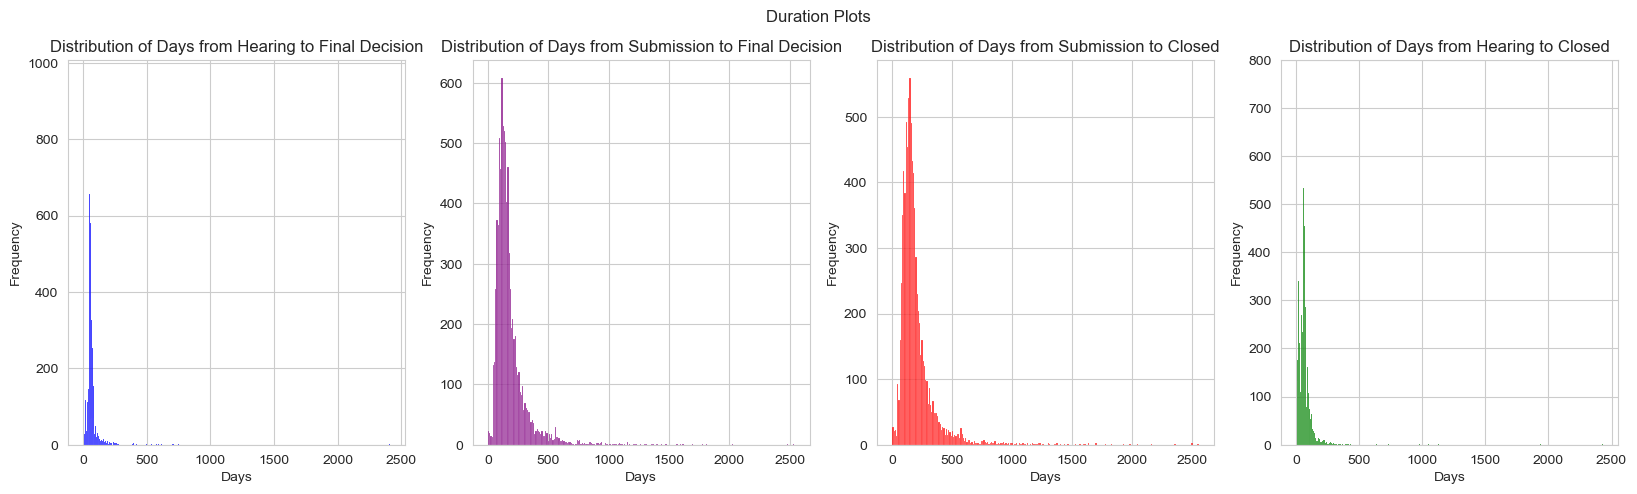

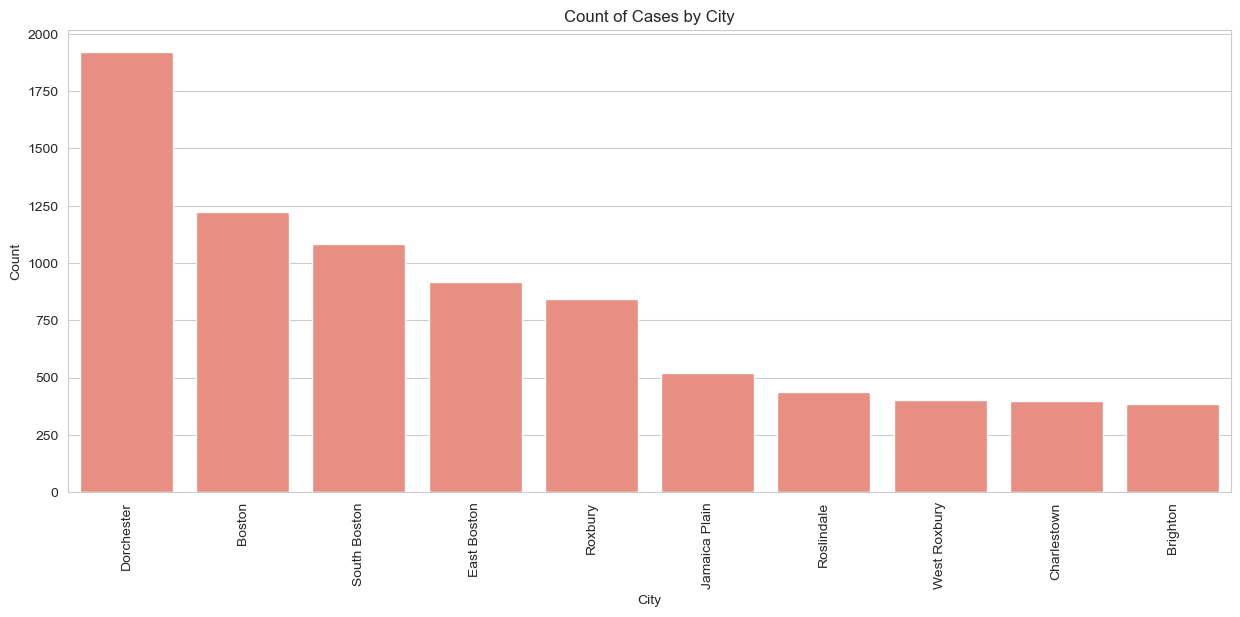

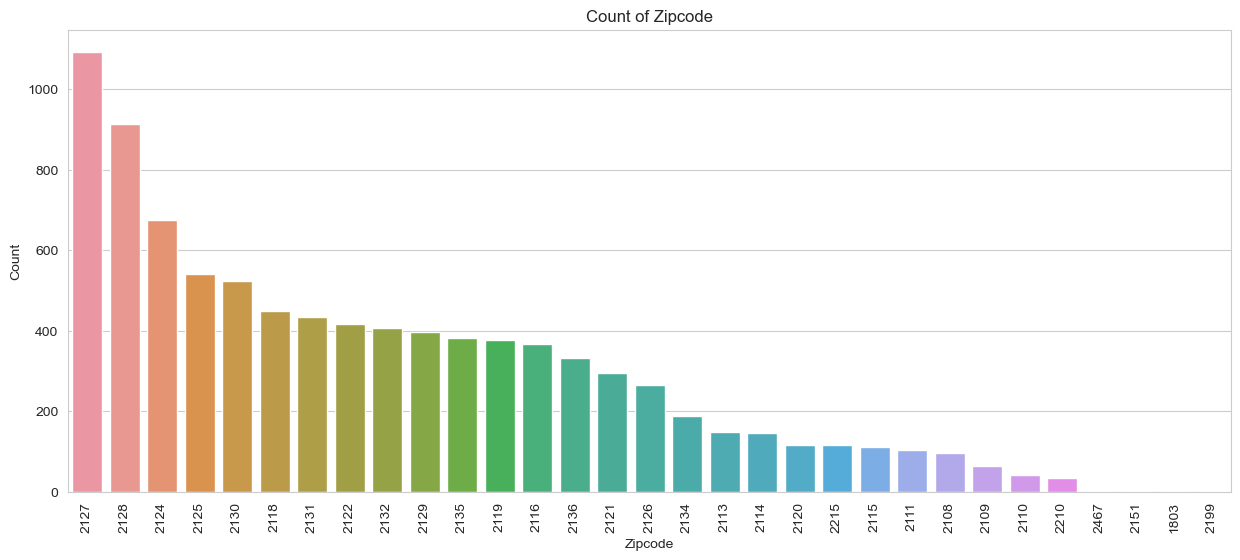

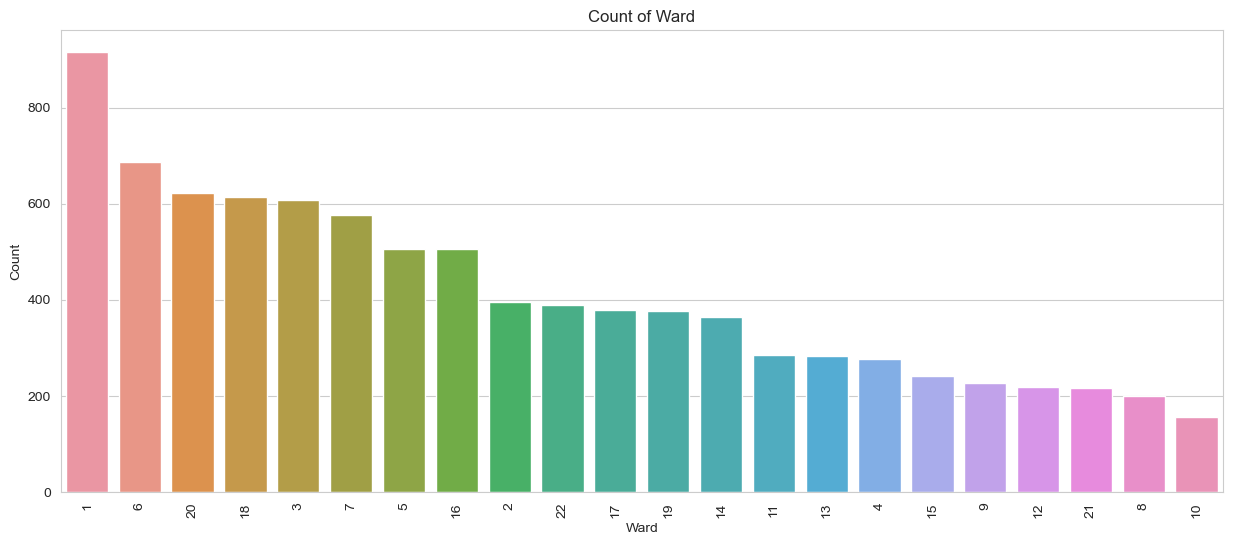

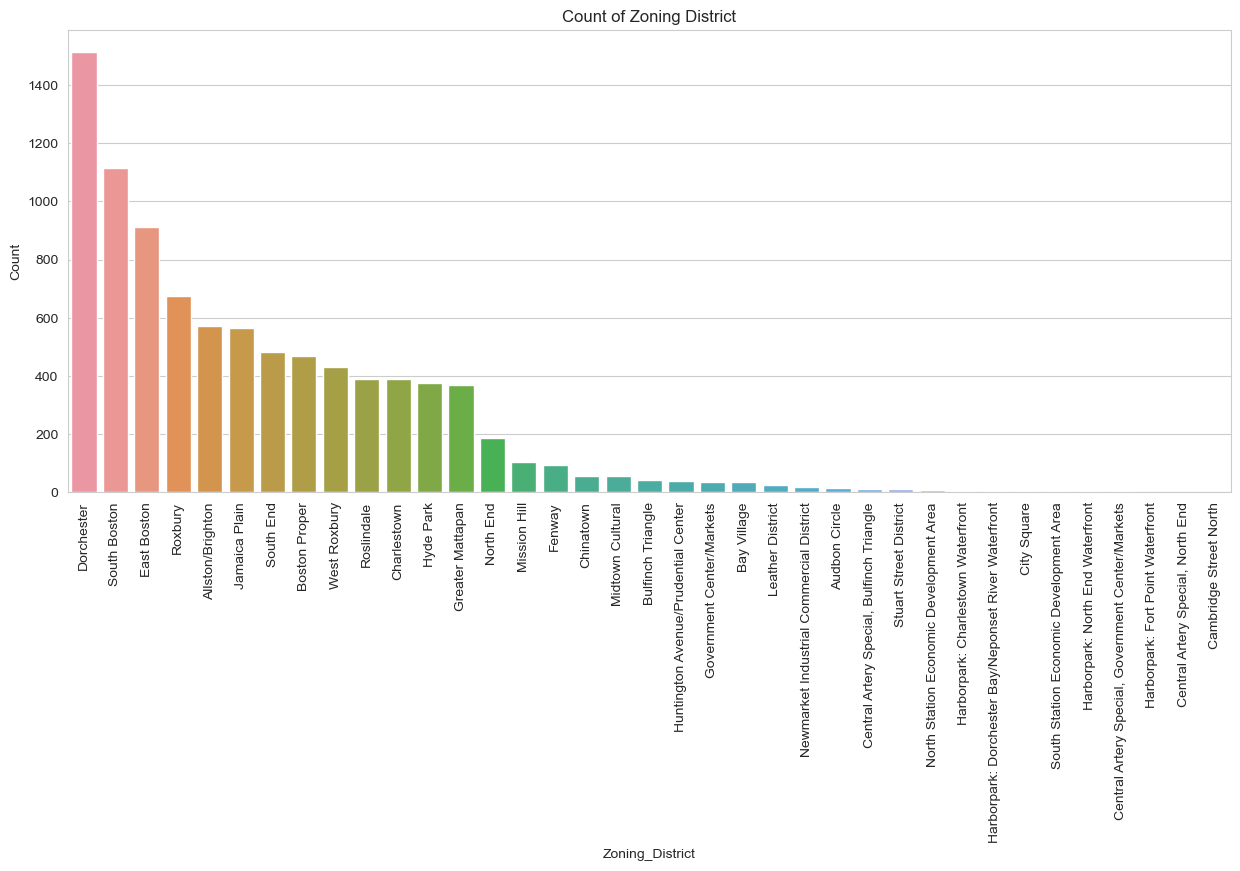

In [20]:
sns.set_style("whitegrid")

## Status Plot =================================================================
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df.loc[df['status'] != 7], color='green')
plt.title('Open Status', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

labels_map = {
    1: 'Appeal Submitted',
    2: 'Community Process',
    3: 'Hearing Scheduled',
    4: 'Hearing Rescheduled',
    5: 'Hearing Concluded',
    6: 'ZBA Decision Finalized',
    7: 'Appeal Closed'
}

plt.xticks(ticks=range(6), labels=[labels_map[i+1] for i in range(6)], rotation=45)
plt.suptitle("Removed Appeal Closed (>8000) to highlight open statuses")
plt.show()

## Appeal Types =================================================================
sns.countplot(x='appeal_type', data=df, color='green')
plt.title('Count of Appeal Types', fontsize=15)
plt.xlabel('Appeal Type (0 = Zoning, 1 = Building)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Decision Types =================================================================
sns.countplot(x='decision', data=df.loc[df.decision.notna()], palette="Set2")
plt.title('Distribution of Decision')
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.show()

## Deferrals =================================================================
sns.countplot(x='deferrals', data=df[df.deferrals.notna()])
plt.title('Count of Number of Deferrals')
plt.xlabel('Number of Deferrals')
plt.ylabel('Count')
plt.show()

## Date Analysis =================================================================
plt.figure(figsize=(15, 5))

# Count plot for Year
plt.subplot(1, 3, 1)
sns.countplot(x='year', data=df, color="skyblue")
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Count plot for Month
plt.subplot(1, 3, 2)
sns.countplot(x='month', data=df, color="olive")
plt.title('Month Distribution')
plt.xlabel('Month')

# Count plot for Day
plt.subplot(1, 3, 3)
sns.countplot(x='day', data=df, color="gold")
plt.title('Day Distribution')
plt.xlabel('Day')

plt.suptitle('Submitted Date Analysis')
plt.tight_layout()
plt.show()

## Duration Analysis =================================================================
plt.figure(figsize=(20, 5))

# Plotting the histogram for Submission to Final Decision
plt.subplot(1, 4, 2)
sns.histplot(df.loc[df.final_submitted > 0]['final_submitted'], kde=False, color="purple")
plt.title('Distribution of Days from Submission to Final Decision')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Plotting the histogram for Hearing to Final Decision
plt.subplot(1, 4, 1)
sns.histplot(df.loc[df.final_hearing > 0]['final_hearing'], kde=False, color="blue")
plt.title('Distribution of Days from Hearing to Final Decision')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Histogram for Days from Submission to Closed
plt.subplot(1, 4, 3)
sns.histplot(df.loc[df.closed_submitted > 0]['closed_submitted'], kde=False, color="red")
plt.title('Distribution of Days from Submission to Closed')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Histogram for Days from Hearing to Closed
plt.subplot(1, 4, 4)
sns.histplot(df.loc[df.closed_hearing > 0]['closed_hearing'], kde=False, color="green")
plt.title('Distribution of Days from Hearing to Closed')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.suptitle('Duration Plots')
plt.show()

## Cases by area

# City
plt.figure(figsize=(15, 6))
sns.countplot(x='city', data=df, order=df['city'].value_counts().nlargest(10).index, color='salmon')
plt.title('Count of Cases by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Zipcode
plt.figure(figsize=(15, 6))
sns.countplot(x='zipcode', data=df, order=df['zipcode'].value_counts().index)
plt.title('Count of Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Ward
plt.figure(figsize=(15, 6))
sns.countplot(x='ward', data=df, order=df['ward'].value_counts().index)
plt.title('Count of Ward')
plt.xlabel('Ward')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# District
plt.figure(figsize=(15, 6))  # You can adjust the size to fit your data
sns.countplot(x='zoning_district', data=df, order=df['zoning_district'].value_counts().index)
plt.title('Count of Zoning District')
plt.xlabel('Zoning_District')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating the labels to make them readable
plt.show()


### Additional EDA

First we have a word cloud looking at what terms come up the most in the project_descriptions (text)

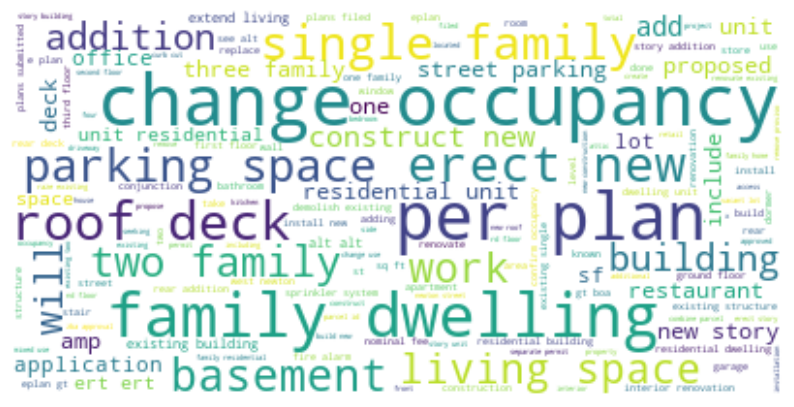

In [26]:
text = " ".join(description for description in df.text.dropna().apply(str))

stopwords = set(STOPWORDS)

# additional_stopwords = {'the', 'a', 'am', 'he', 'him', ...}
# stopwords.update(additional_stopwords)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Finally we have another set of graphs looking at decisions over time for the top cities/neighborhoods

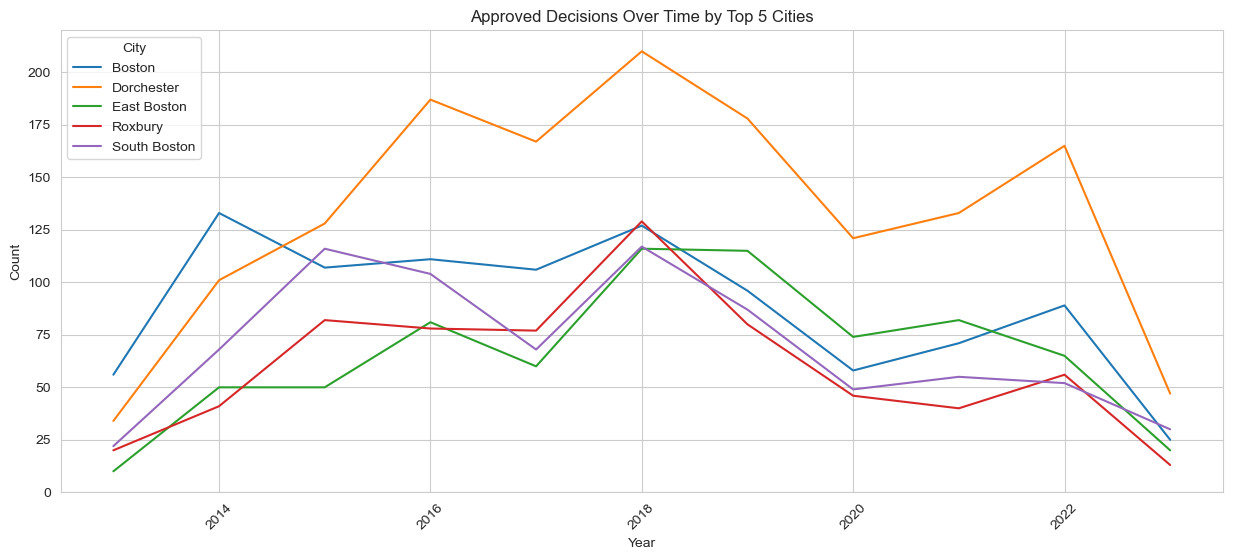

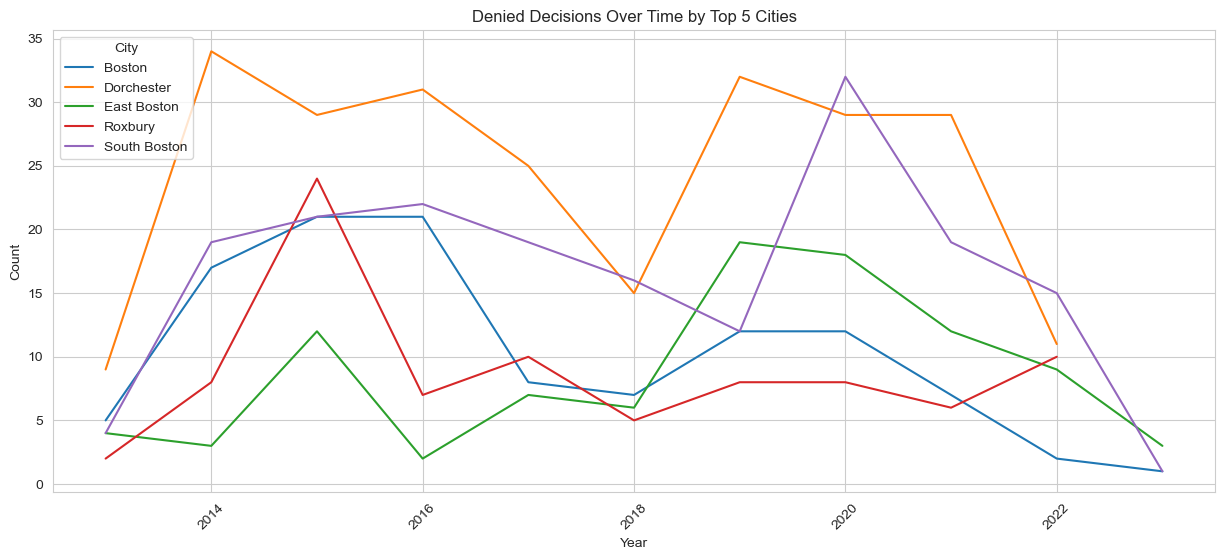

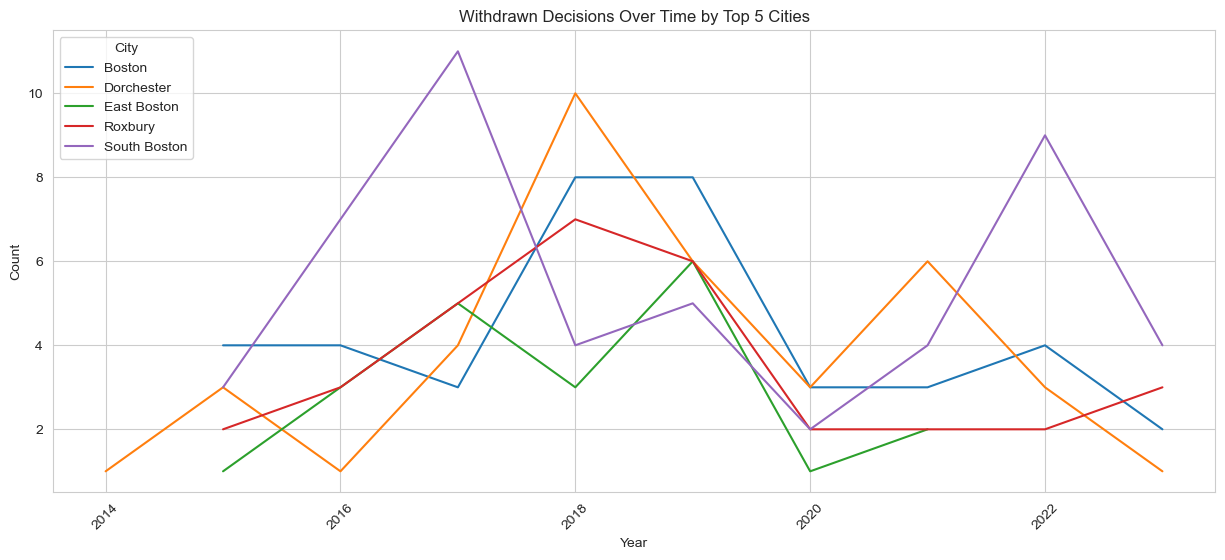

In [29]:
grouped_df = df.groupby(['city', 'year', 'decision']).size().reset_index(name='count')

# Filter the data for each decision type
approved_df = grouped_df[grouped_df['decision'] == 'Approved']
denied_df = grouped_df[grouped_df['decision'] == 'Denied']
other_df = grouped_df[grouped_df['decision'] == 'Withdrawn']  # Replace 'Other' as needed

# Identify top 5 cities for each decision type based on total count
top_approved_cities = approved_df.groupby('city')['count'].sum().nlargest(5).index
top_denied_cities = denied_df.groupby('city')['count'].sum().nlargest(5).index
top_other_cities = other_df.groupby('city')['count'].sum().nlargest(5).index

# Filter data to include only top 5 cities for each decision type
approved_df_top5 = approved_df[approved_df['city'].isin(top_approved_cities)]
denied_df_top5 = denied_df[denied_df['city'].isin(top_denied_cities)]
other_df_top5 = other_df[other_df['city'].isin(top_other_cities)]

# Plotting for 'Approved' - Top 5 Cities
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='count', hue='city', data=approved_df_top5)
plt.title('Approved Decisions Over Time by Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left')
plt.show()

# Plotting for 'Denied' - Top 5 Cities
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='count', hue='city', data=denied_df_top5)
plt.title('Denied Decisions Over Time by Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left')
plt.show()

# Plotting for 'Withdrawn' - Top 5 Cities
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='count', hue='city', data=other_df_top5)
plt.title('Withdrawn Decisions Over Time by Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left')
plt.show()
